# Task 1. Correlation Power Analysis attack

### created: 21.01.2020

### by David Zashkolny
### 3 course, comp math
### Taras Shevchenko National University of Kyiv
### email: davendiy@gmail.com


In [30]:
### Excusa. Quod scripsi, scripsi.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 10]   # size of matplotlib windows

## Preparing

In [31]:
# subtitution box for AES-128
Sbox = np.array(
       [0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16]
)

# array of values of hamming_weight function for bytes from 0 to 255
hamming_weight = np.array([bin(n).count("1") for n in range(0, 256)])


def aes_first_round(data, key):
    """ Vectorized function for doing the first round of AES-128.
    """
    return hamming_weight[Sbox[data ^ key]]


def vcorrcoef(X, y):
    """ Vectorized function for Pearson's correlation coefficient.
    
    :param X: matrix (ndarray) of NxM elements
    :param y: vector (ndarray) of 1xM elements
    :return: vector C = [cor(X[0], y), cor(X[1], y), cor(X[2], y) ...]
    """
    Xm = np.reshape(np.mean(X,axis=1),(X.shape[0],1))
    ym = np.mean(y)
    r_num = np.sum((X-Xm)*(y-ym),axis=1)
    r_den = np.sqrt(np.sum((X-Xm)**2,axis=1)*np.sum((y-ym)**2))
    r = r_num/r_den
    return abs(r)

## Loading of data

In [4]:
keylist = np.load('./sca-f3/test/keylist.npy')
textin = np.load('./sca-f3/test/textin.npy')
# textout = np.load('./sca-f3/train/textout.npy')
traces = np.load('./sca-f3/test/traces.npy')

In [5]:
print(keylist.shape)
print(textin.shape)
# print(textout.shape)
print(traces.shape)

(1000,)
(1000, 16)
(1001, 5000)


## Let's check how many different keys in dataset

In [6]:
keylist2 = np.load('./sca-f3/test/keylist.npy')

res = []
for i in range(len(keylist)-1):
    if list(keylist[i]) != list(keylist[i+1]):
        res.append(i+1)
print(res)

[100, 200, 300, 400, 500, 600, 700, 800, 900]


## Let's also check whether the traces are shifted or not, and whether they noised or not

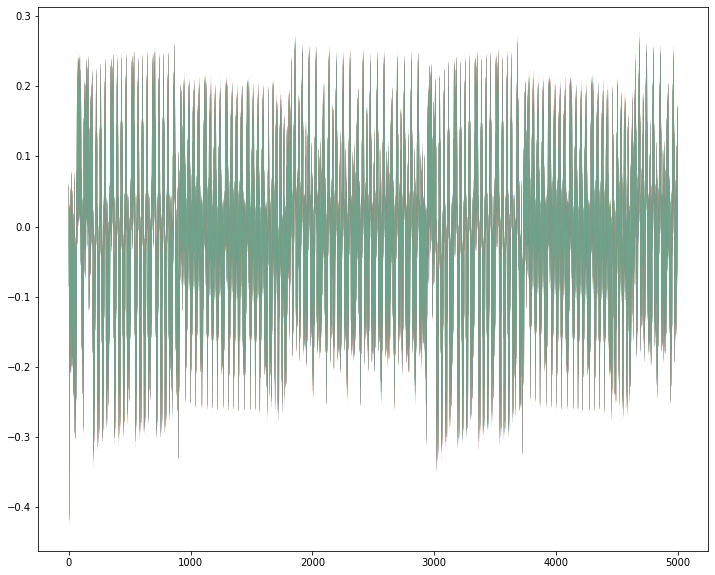

In [7]:
for i in range(15, 25):
    plt.plot(traces[i], linewidth=.1)

## Trying the vectorized functions

In [37]:
tmp = textin[:100]     # first 100x16 blocks that will be ciphered with same key 

# array 256x100x16 - hypotheses of possible bytes
# <possible_byte> x <samples> x <byte_of_key>
hypotheses = np.array([np.zeros((100, 16), 'uint8') + i for i in range(256)])
aes_first_round(tmp, hypotheses).shape

(256, 100, 16)

In [28]:
def investigate2(text_in, traces, true_key, printt=True):
    """ Function that does research for one key. 
    
    Research means finding the minimal amount of traces for rebuilding the
    key using CPA. The search realized as binary search throught the answer.
    
    :param text_in: array of Nx16 elements - N blocks of input text, that will be 
                    ciphered using the same key
    :param traces: array of Nx5000 elements - N traces of power consumption of the device that 
                   makes the AES protocol
    :param true_key: array of 16 elements - real key for comparing the result
    :param printt: True if you want to print the auxiliary information during the research
    :return: minimal amount of traces for the given key
    """
    
    # array 256xNx16 = <possible_bytes> x <amount_of_blocks> x <key's_len>
    hypotheses = np.array([np.zeros((len(text_in), 16), 'uint8') + i for i in range(256)])
    
    # hws[hyp, sample_num, byte_num] = hamming weight of <byte_num> byte of <sample_num> block
    # after making the first round of AES using the <byte_num> byte of key that equals to <hyp>
    hws = aes_first_round(text_in, hypotheses)
    
    traces = traces.transpose()  # transpose for vectorized function
    
    if printt:
        print(f"true_key: {true_key}")

    ta_l = 10                    # initial parameters for binary search
    ta_r = len(traces[0])        # corresponding left and right bounds

    traces_amount = len(traces[0])
    
    # binary search
    while True:
        traces_amount = ta_l + (ta_r - ta_l) // 2   # current step 
        if (ta_r - ta_l) <= 1:
             traces_amount = ta_r
             break
            
        if printt:
            print(f'\ntraces_amount: {traces_amount}')
            
        # initial parameters for CPA
        best_corrs = np.zeros(16)            # array of best correlations for each byte of key
        best_bytes = np.zeros(16, 'uint8')   # array of best values for each byte of key
        best_places = np.zeros(16)           # array of best places for each byte of key
        
        k = 0   # parameter for printing the counter (each 300 steps)
        if printt:
            print('cur_place:    ', end='')
        
        for place in range(len(traces)):    # main cycle - through all the places on traces
            for byte_num in range(16):
                hw = hws[:, :traces_amount, byte_num]   # corresponding hamming weights
                cur_cors = vcorrcoef(hw, traces[place, :traces_amount])   # calculates the correlations
                tmp_best_cor = np.max(cur_cors)         # find the hyp with max correlation
                
                # if we found greater correlation - update the values
                if tmp_best_cor > best_corrs[byte_num]:
                    best_corrs[byte_num] = tmp_best_cor
                    best_bytes[byte_num] = np.argmax(cur_cors)
                    best_places[byte_num] = place
            
            if printt:        # printing the updatable counter (counter that deletes and prints again)
                if k == 0:
                    for _ in range(len(str(max(place - 300, 0)))):
                        print('\b', end='', flush=True)
                    print(place, end='', flush=True)
                k += 1
                k %= 300
        
        # step of binary search
        # if we can rebuild the key - we must take the less number of traces
        # otherwise - more number
        if len(best_places[best_bytes != true_key]) == 0:   
            ta_r = traces_amount                            
        else:
            ta_l = traces_amount + 1
            
        if printt:
            print(f'\nfound_key: {best_bytes}')
            # print(f'correlations: {best_corrs}')
            # print(f'places: {best_places}')
            print(f'bad bytes: {np.arange(16)[best_bytes != true_key]}')
            print(f'bad places: {best_places[best_bytes != true_key]}')
    return traces_amount

In [29]:
print_str = '\n\ncur_i: {}, max min_amount: {}, average min_amount: {}, all_min_amounts: {}'
prev_str = ''
min_amounts = np.zeros(10, 'uint8')   # array of the results of investigation
max_min = 0 
av_min = 0

prev_str = print_str.format(i, max_min, av_min, min_amounts) 
for i in range(10):
    if i != 0:       # division by zero
        prev_str = print_str.format(i, max_min, av_min/i, min_amounts) 
   
    print(prev_str)
    min_amount = investigate2(textin[i*100: (i+1)*100], traces[i*100: (i+1)*100], keylist[i*100], printt=True)
    av_min += min_amount
    max_min = max(max_min, min_amount)
    min_amounts[i] = min_amount

print(min_amounts)



cur_i: 0, max min_amount: 0, average min_amount: 0.0, all_min_amounts: [0 0 0 0 0 0 0 0 0 0]
true_key: [117  78  52  68  90  68 107 115 110  82 113 111 115  49  49 103]

traces_amount: 55
cur_place:   4800
found_key: [117  78  52  68  90  68 107 115 110  82 113 111 115  49  49 103]
bad bytes: []
bad places: []

traces_amount: 32
cur_place:   4800
found_key: [117  78  52  68  90  68 107 115 110  82 113 111 115  49  49 103]
bad bytes: []
bad places: []

traces_amount: 21
cur_place:   4800
found_key: [117 133  52  68  90  68 107 115 110  82 219 148 115  49 193 103]
bad bytes: [ 1 10 11 14]
bad places: [ 933. 2901. 4244. 3470.]

traces_amount: 27
cur_place:   4800
found_key: [117  78  52  68  90  68 107 115 110  82 139 111 115  49  49 103]
bad bytes: [10]
bad places: [3147.]

traces_amount: 30
cur_place:   4800
found_key: [117  78  52  68  90  68 107 115 110  82 113 111 115  49  49 103]
bad bytes: []
bad places: []

traces_amount: 29
cur_place:   4800
found_key: [117  78  52  68  90  68 

cur_place:   4800
found_key: [ 66 100 105 110  86  65  85  75  90  49 106 112 110  80 120 109]
bad bytes: []
bad places: []

traces_amount: 34
cur_place:   4800
found_key: [ 66 100 105 110  86  65  85  75  90  49 106 112 110  80 120 109]
bad bytes: []
bad places: []


cur_i: 8, max min_amount: 34, average min_amount: 29.375, all_min_amounts: [30 27 32 32 26 27 27 34  0  0]
true_key: [ 52  53 111 109 107  88  80  53  85  85  65  71 106  73 103 122]

traces_amount: 55
cur_place:   4800
found_key: [ 52  53 111 109 107  88  80  53  85  85  65  71 106  73 103 122]
bad bytes: []
bad places: []

traces_amount: 32
cur_place:   4800
found_key: [ 52  53 111 109 107  88  80  53  85  85  65  71 106  73 103 122]
bad bytes: []
bad places: []

traces_amount: 21
cur_place:   4800
found_key: [ 52  53 111 109 107  88   9  53 173 132  65 129 106  73 103 122]
bad bytes: [ 6  8  9 11]
bad places: [1147. 3747. 4910. 3028.]

traces_amount: 27
cur_place:   4800
found_key: [ 52  53 111 109 107  88  80  53  85 

In [34]:
print(min_amounts)
print(max(min_amounts), min_amounts.mean())

[30 27 32 32 26 27 27 34 29 27]
34 29.1
